# Retail Superstore Analysis

This is a fictional dataset to simulate the sales of a retail store. We will do some data cleaning and an EDA before exporting this dataset to visualize it in a Tableau Dashboard.

### Libraries & Dataset

In [1]:
# First we import the main libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df_store = pd.read_csv('./Superstore.csv', encoding='latin-1', delimiter=',')
df_store.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,1/01/11,6/01/11,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/01/11,8/01/11,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/01/11,5/01/11,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/01/11,5/01/11,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/01/11,8/01/11,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
df_store.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

In [4]:
# There are 51,290 rows and 24 columns
df_store.shape

(51290, 24)

### Data Cleaning

We will look for some basic things that are potential for data cleaning:
* Change the data type
* Fill / Drop null values
* Improve some string fields

In [5]:
df_store.dtypes

Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
City               object
State              object
Country            object
Postal_Code       float64
Market             object
Region             object
Product_ID         object
Category           object
Sub-Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

In [6]:
# As we saw, we need to change Order_Date & Ship_Date from strings to dates.
df_store['Order_Date'] = pd.to_datetime(df_store['Order_Date'])
df_store['Ship_Date'] = pd.to_datetime(df_store['Ship_Date'])

# Additionaly, we create new variables for month and week:
df_store['Order_Month'] = df_store['Order_Date'].dt.month 
df_store['Order_Day_Week'] = df_store['Order_Date'].dt.dayofweek + 1


In [7]:
df_store.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Order_Month,Order_Day_Week
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,1,6
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,1,6
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,1,6
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,1,6
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,1,6


In [8]:
# Analysis of null values
df_store.isna().sum()

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub-Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
Order_Month           0
Order_Day_Week        0
dtype: int64

We see that the only variable where there are null values is Postal_Code. Based on the nature of this analysis, it is plausible to think that we could just drop the variable without affecting the dataset.

In [9]:
df_store.drop('Postal_Code', axis=1, inplace = True)

In [10]:
df_store.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order_Priority', 'Order_Month', 'Order_Day_Week'],
      dtype='object')

### Exploratory Data Analysis

We first have to analyze the distribution of all the variables:

array([[<Axes: title={'center': 'Row_ID'}>,
        <Axes: title={'center': 'Order_Date'}>,
        <Axes: title={'center': 'Ship_Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>,
        <Axes: title={'center': 'Shipping_Cost'}>,
        <Axes: title={'center': 'Order_Month'}>],
       [<Axes: title={'center': 'Order_Day_Week'}>, <Axes: >, <Axes: >]],
      dtype=object)

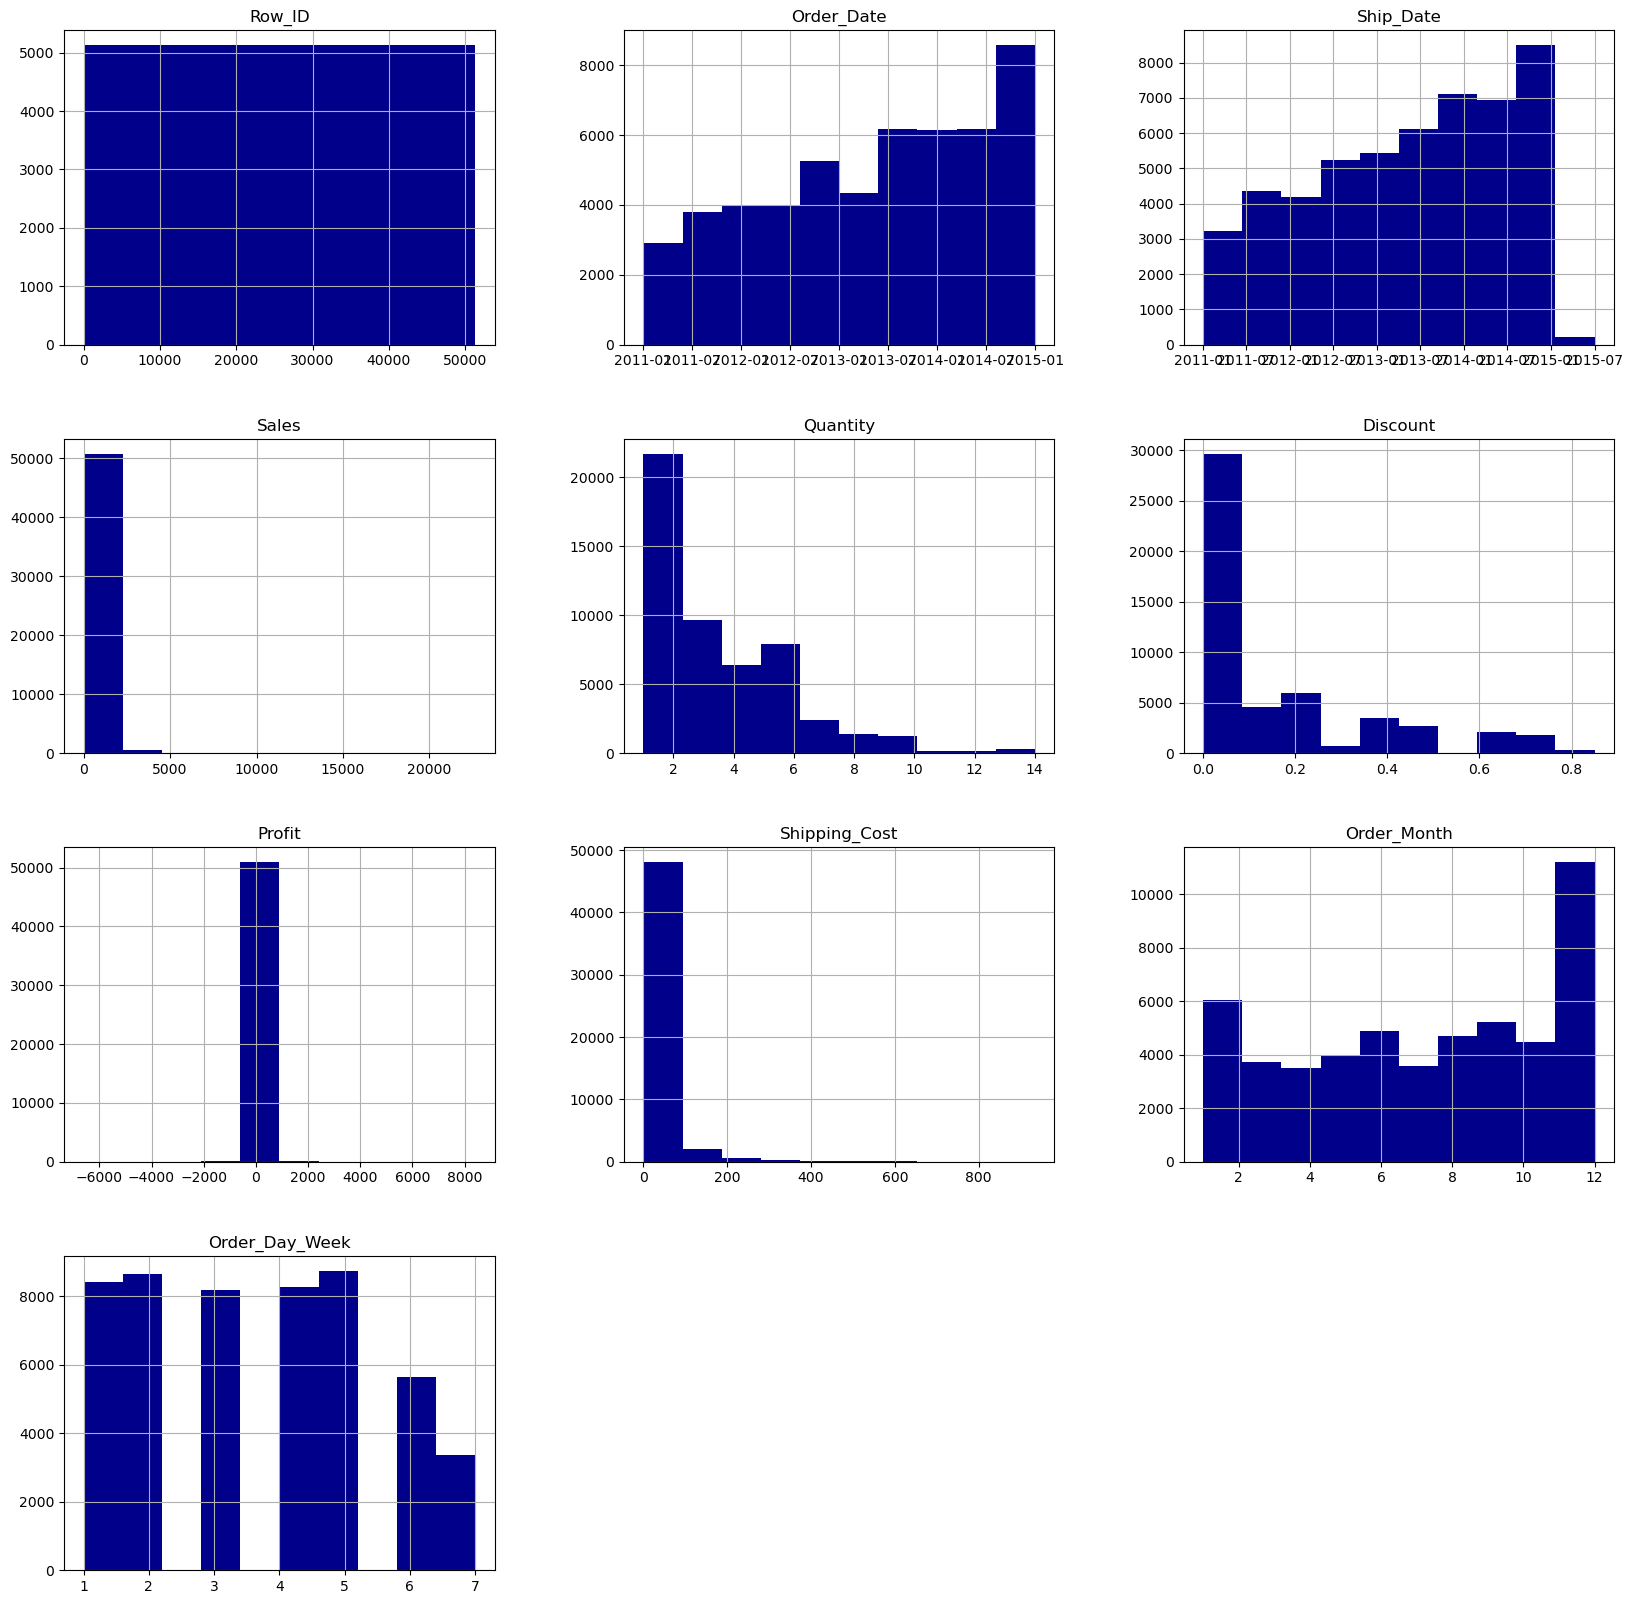

In [11]:
df_store.hist(figsize = (20,20), color = 'darkblue')

By looking these distributions, we can see that there are more orders and shipments in the last days of this dataset.The shipping cost and the sales variables have some outliers, and the profit variable spans in a wide range from negative to positive values, but most of them are near 0.

#### Date Variables

Next, we analyze the date variables by Sales and Profit

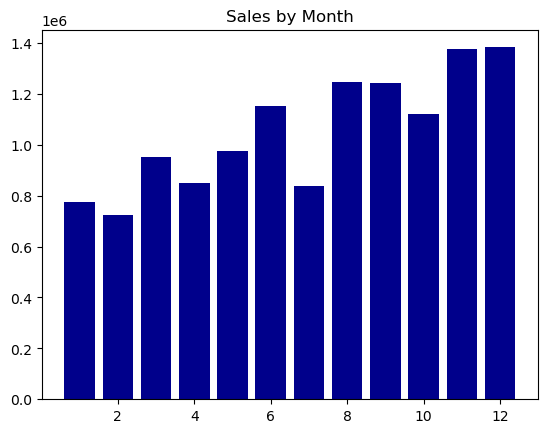

In [12]:
sales_by_month = df_store.groupby('Order_Month')['Sales'].sum().reset_index()

plt.bar(sales_by_month['Order_Month'], sales_by_month['Sales'], color = 'darkblue')
plt.title('Sales by Month')
plt.show()

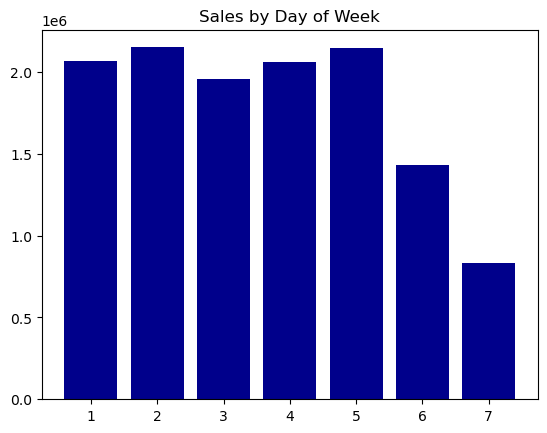

In [13]:
sales_by_dayweek = df_store.groupby('Order_Day_Week')['Sales'].sum().reset_index()
plt.bar(sales_by_dayweek['Order_Day_Week'], sales_by_dayweek['Sales'], color = 'darkblue')
plt.title('Sales by Day of Week')
plt.show()

The two graphs above show that, throughout the whole year, the top-selling months are november and december. This could mean that the principal products sold in store could have a slight seasonal pattern. Something similar can be derived from the second graph, where the highest sales occur during monday to friday.

#### Sales & Profits by Segments

Now we will analyze the other categories by Sales and Protift

In [14]:
df_store.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order_Priority', 'Order_Month', 'Order_Day_Week'],
      dtype='object')

<BarContainer object of 3 artists>

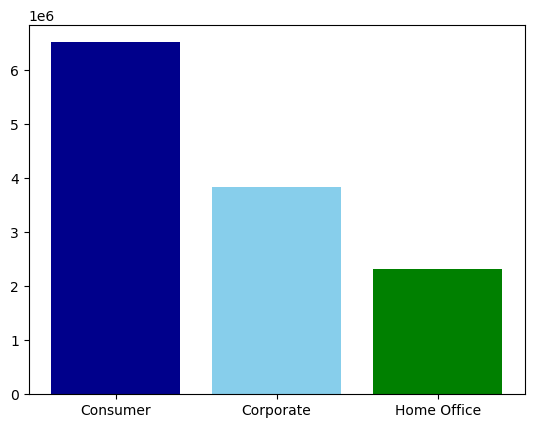

In [15]:
# Segment & Sales
segment_sales = df_store.groupby('Segment')['Sales'].sum().reset_index()
plt.bar(segment_sales['Segment'], segment_sales['Sales'], color = ['darkblue', 'skyblue', 'green'])

<BarContainer object of 3 artists>

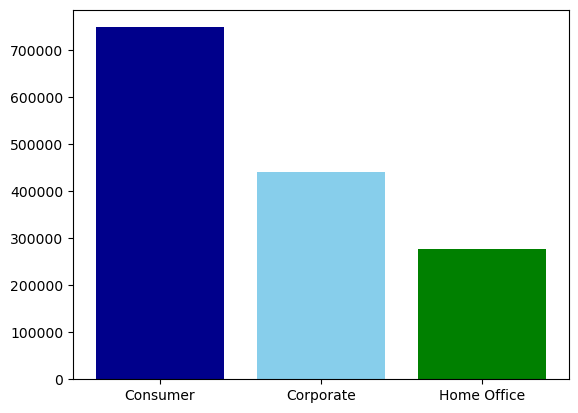

In [16]:
# Segment & Profit
segment_profit = df_store.groupby('Segment')['Profit'].sum().reset_index()
plt.bar(segment_profit['Segment'], segment_profit['Profit'], color = ['darkblue', 'skyblue', 'green'])

<BarContainer object of 3 artists>

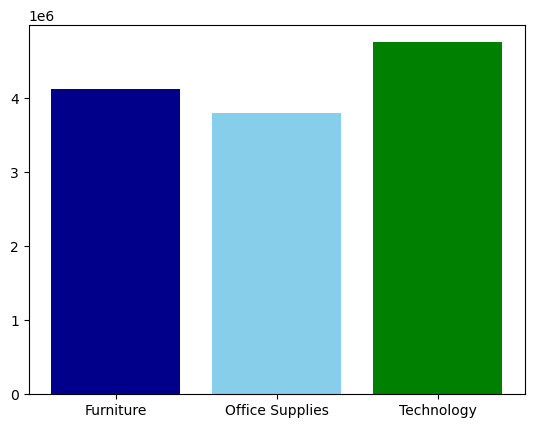

In [17]:
# Category & Sales
category_sales = df_store.groupby('Category')['Sales'].sum().reset_index()
plt.bar(category_sales['Category'], category_sales['Sales'], color = ['darkblue', 'skyblue', 'green'])

<BarContainer object of 3 artists>

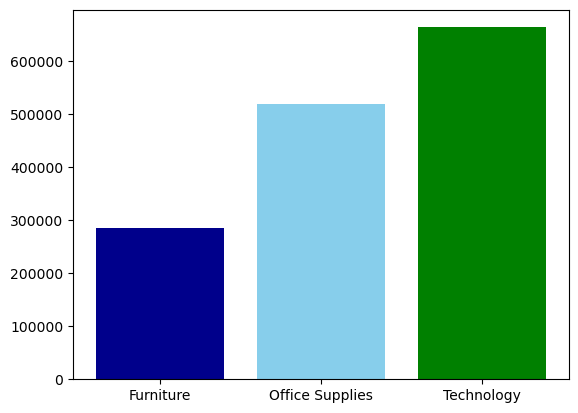

In [18]:
# Category & Profit
category_profit = df_store.groupby('Category')['Profit'].sum().reset_index()
plt.bar(category_profit['Category'], category_profit['Profit'], color = ['darkblue', 'skyblue', 'green'])

<BarContainer object of 17 artists>

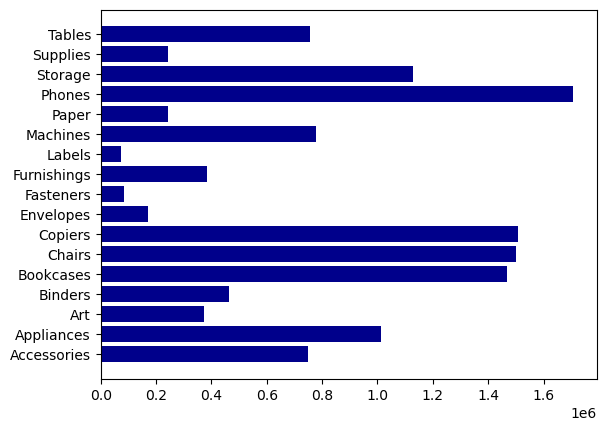

In [19]:
# Sub-Category & Sales
subcategory_sales = df_store.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.barh(subcategory_sales['Sub-Category'], subcategory_sales['Sales'], color = 'darkblue')

In [26]:
# Product-Name & Sales
product_sales = df_store.groupby('Product_Name')['Sales'].sum().reset_index()
product_sales.sort_values(by='Sales', ascending = False).head(10)

,Product_Name,Sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


In [28]:
# Product-Name & Profit
product_profit = df_store.groupby('Product_Name')['Profit'].sum().reset_index()
product_profit.sort_values(by='Profit', ascending = False).head(10)

,Product_Name,Profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


In [29]:
# Product-Name & Shipping Cost
product_shipping = df_store.groupby('Product_Name')['Shipping_Cost'].sum().reset_index()
product_shipping.sort_values(by='Shipping_Cost', ascending = False).head(10)

,Product_Name,Shipping_Cost
2415,"Motorola Smart Phone, Full Size",8817.34
310,"Apple Smart Phone, Full Size",8027.73
2501,"Nokia Smart Phone, Full Size",7852.66
970,"Cisco Smart Phone, Full Size",7065.16
1714,"Harbour Creations Executive Leather Armchair, ...",6548.17
2988,"Samsung Smart Phone, Cordless",5892.09
1837,"Hon Executive Leather Armchair, Adjustable",5751.56
2502,"Nokia Smart Phone, with Caller ID",5321.11
2524,"Novimex Executive Leather Armchair, Adjustable",5190.86
2631,"Office Star Executive Leather Armchair, Adjust...",5141.74


The graphs and tables above gives us deeper insights about what the store sells the most. Apparently, they have a strong focus on mobile phones, where the ones with the most sales are phones from the following brands:
- Apple
- Cisco
- Motorola
- Nokia

This is important because selling this very popular brands allow the retail store to establish a well-known name in the market. In fact, to know this should give the company the time required to prepare accordingly for the last two months in the year, when they sell the most. The company has to buy the estimated required stock, appart from tuning their process operations.

Nevertheless, they should not neglect the sales of their other non-mobile products like their copiers, furniture and so on, as these product drive the profits to the company.

In [31]:
# Final Exporting
df_store.to_csv('Superstore_Dataset_Cleaned.csv', index = False)

### Conclusions

This EDA shows very interesting facts about this dataset. This should give us a very strong base to construct any further visualizations in a platform like Tableau, where the idea is to view the main metrics but in a continious way as soon as new data is available.